<a href="https://colab.research.google.com/github/7uv/7uv/blob/main/DL_GWP1_4601_SG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# All imports

import warnings
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# Notebook config
# ignore warnings
warnings.simplefilter("ignore")

# Image format
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 4)

# set Numpy random seed for consistent results
np.random.seed(0)

# Table format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.precision', 2)
%precision %.2f

# Output format
getcontext().prec = 2
np.set_printoptions(precision=2)

# Ans 1a

[*********************100%%**********************]  1 of 1 completed
Summary Statistics:
           Open      High       Low     Close  Adj Close             Volume
count    730.00    730.00    730.00    730.00     730.00             730.00
mean  37,840.40 38,790.40 36,734.55 37,817.34  37,817.34  38,584,504,309.43
std   13,859.73 14,225.23 13,451.61 13,871.74  13,871.74  21,410,885,036.36
min   15,782.30 16,253.05 15,599.05 15,787.28  15,787.28   9,744,636,213.00
25%   23,187.97 23,567.54 22,728.66 23,167.44  23,167.44  26,134,188,852.50
50%   38,743.27 39,791.96 37,551.92 38,721.62  38,721.62  33,355,300,054.00
75%   47,800.77 49,188.96 46,749.12 47,765.39  47,765.39  46,110,068,125.00
max   67,549.73 68,789.62 66,382.06 67,566.83  67,566.83 350,967,941,479.00

Persistence (Autocorrelation):
0.9939263990095685


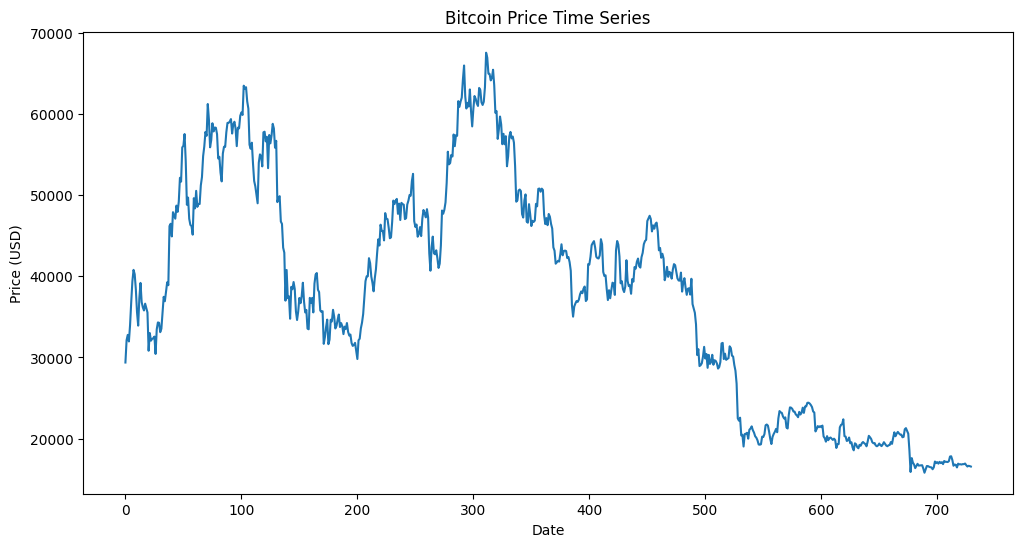

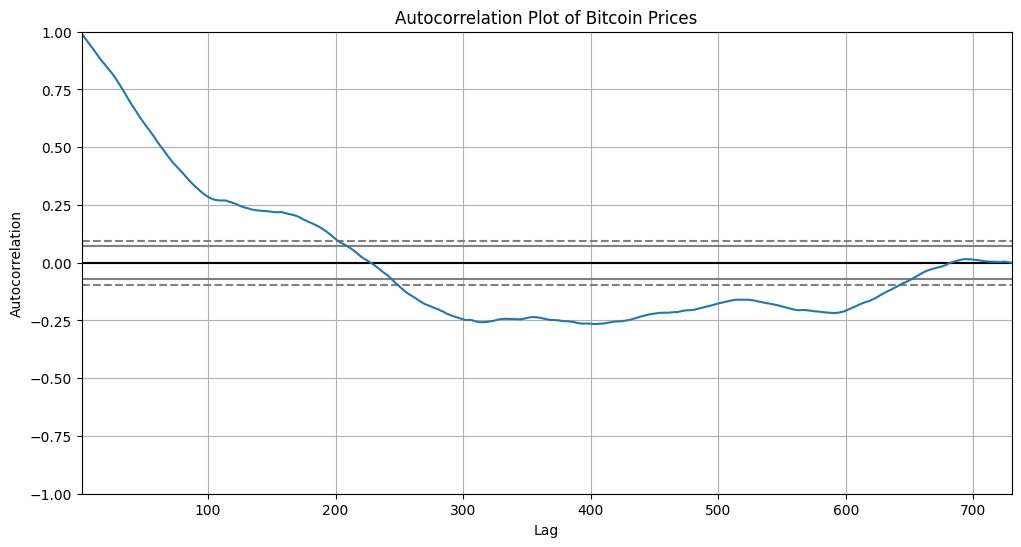


Augmented Dickey-Fuller Test for Stationarity:
ADF Statistic: -1.15
P-value: 0.69
Critical Values:
  1%: -3.44
  5%: -2.87
  10%: -2.57


In [26]:
def download_bitcoin_data():
    # Download Bitcoin price data from Yahoo Finance
    bitcoin_data = yf.download('BTC-USD', start='2021-01-01', end='2023-01-01')
    # Select relevant columns
    bitcoin_data = bitcoin_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    # Handle null and NaN values
    bitcoin_data = bitcoin_data.dropna()
    # Limit the rows to 2000 values
    bitcoin_data = bitcoin_data.tail(2000)
    # Reset index and add a Date column
    bitcoin_data.reset_index(inplace=True)
    return bitcoin_data

if __name__ == "__main__":
    # Download Bitcoin price data
    bitcoin_data = download_bitcoin_data()
    bitcoin_close = bitcoin_data['Close']

    # Display summary statistics
    print("Summary Statistics:")
    print(bitcoin_data.describe())

    # Display persistence (autocorrelation)
    print("\nPersistence (Autocorrelation):")
    print(bitcoin_data['Close'].autocorr())

    # Plot the Bitcoin prices time series
    plt.figure(figsize=(12, 6))
    plt.plot(bitcoin_data['Close'])
    plt.title('Bitcoin Price Time Series')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.show()

    # Autocorrelation plot for persistence analysis
    plt.figure(figsize=(12, 6))
    pd.plotting.autocorrelation_plot(bitcoin_data['Close'])
    plt.title('Autocorrelation Plot of Bitcoin Prices')
    plt.show()

    # Augmented Dickey-Fuller Test for Stationarity
    adf_result = adfuller(bitcoin_data['Close'].dropna())
    print("\nAugmented Dickey-Fuller Test for Stationarity:")
    print(f"ADF Statistic: {adf_result[0]:.2f}")
    print(f"P-value: {adf_result[1]:.2f}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"  {key}: {value:.2f}")


## Detailed analysis

Here are the observations from the provided analysis:

### Persistence (Autocorrelation):
The autocorrelation of the 'Close' prices in the Bitcoin time series is approximately 0.994. This high autocorrelation value indicates strong positive correlation between the values at different time lags. In other words, past values of the 'Close' prices strongly influence future values. This information is crucial for time series modeling and forecasting.

### Augmented Dickey-Fuller Test for Stationarity:
The Augmented Dickey-Fuller (ADF) test is used to check the stationarity of a time series. Here are the results:

- **ADF Statistic:** -1.1544
- **P-value:** 0.6929
- **Critical Values:**
  - 1%: -3.4394
  - 5%: -2.8655
  - 10%: -2.5689

### Stationarity Check:
The ADF Statistic is compared against critical values at different significance levels (1%, 5%, and 10%). The p-value is also considered. In this case:
- The ADF Statistic (-1.1544) is greater than the critical values.
- The p-value (0.6929) is greater than the common significance levels (1%, 5%, 10%).

### Interpretation:
The p-value is higher than the significance level (e.g., 0.05), suggesting that we fail to reject the null hypothesis. The null hypothesis of the ADF test is that the time series has a unit root and is non-stationary. Since we cannot reject this hypothesis, there is evidence that the Bitcoin time series may not be stationary.

### Action Items:
- The non-stationarity of the time series might require further transformations (e.g., differencing) for achieving stationarity.
- The high autocorrelation indicates potential for capturing temporal patterns in modeling.

### Next Steps:
Next, we apply log transformation to make the time series stationary before proceeding with further analysis or modeling. Additionally, we also explore the impact of these transformations on autocorrelation and stationarity.

# Ans 1b

In [ ]:
def check_stationarity_log(data):
    result = adfuller(data, autolag='AIC')
    print("\nAugmented Dickey-Fuller Test for Stationarity (After Log Transformation):")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

# Log transformation to stabilize variance
bitcoin_data['Close_Log'] = bitcoin_data['Close'].apply(lambda x: 0 if x == 0 else np.log(x))

# Display summary statistics
print("Summary Statistics (After Log Transformation):")
print(bitcoin_data.describe())

# Display persistence (autocorrelation) after log transformation
print("\nPersistence (Autocorrelation) After Log Transformation:")
print(bitcoin_data['Close_Log'].autocorr())

# Check for stationarity after log transformation
print("\nStationarity Check After Log Transformation:")
check_stationarity_log(bitcoin_data['Close_Log'].dropna())


Summary Statistics (After Log Transformation):
           Open      High       Low     Close  Adj Close    Volume  Close_Log
count    730.00    730.00    730.00    730.00     730.00  7.30e+02     730.00
mean   37840.40  38790.40  36734.55  37817.34   37817.34  3.86e+10      10.46
std    13859.73  14225.23  13451.61  13871.74   13871.74  2.14e+10       0.41
min    15782.30  16253.05  15599.05  15787.28   15787.28  9.74e+09       9.67
25%    23187.97  23567.54  22728.66  23167.44   23167.44  2.61e+10      10.05
50%    38743.27  39791.96  37551.92  38721.62   38721.62  3.34e+10      10.56
75%    47800.77  49188.96  46749.12  47765.39   47765.39  4.61e+10      10.77
max    67549.73  68789.62  66382.06  67566.83   67566.83  3.51e+11      11.12

Persistence (Autocorrelation) After Log Transformation:
0.9956017567343454

Stationarity Check After Log Transformation:

Augmented Dickey-Fuller Test for Stationarity (After Log Transformation):
ADF Statistic: -0.5243902260991998
p-value: 0.88716838

Here are the observations after applying the log transformation:

### Persistence (Autocorrelation) After Log Transformation:
The autocorrelation of the 'Close' prices after the log transformation is approximately 0.9956. This indicates a very high positive correlation between the values at different time lags, suggesting that the log transformation has retained strong temporal dependence.

### Augmented Dickey-Fuller Test for Stationarity (After Log Transformation):
The p-value of 0.8872 in the Augmented Dickey-Fuller (ADF) test is considerably higher than common significance levels (1%, 5%, 10%). This suggests that the time series, after the log transformation, is not stationary. The ADF Statistic is not significantly below the critical values.

### Interpretation:
- The log transformation has not made the time series stationary based on the ADF test.
- The high autocorrelation indicates that temporal patterns are still present in the log-transformed series.

### Next Steps:
Considering that the log transformation did not achieve stationarity in this case, we explore differencing transformations or a combination of techniques (e.g., differencing after log transformation) to achieve the desired stationarity.

In [ ]:
def check_stationarity_diff(data):
    result = adfuller(data, autolag='AIC')
    print("\nAugmented Dickey-Fuller Test for Stationarity (After Differencing):")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

# Log transformation followed by differencing
bitcoin_data['Close_Log_Diff'] = bitcoin_data['Close'].apply(lambda x: 0 if x == 0 else np.log(x)).diff().dropna()

# Display summary statistics
print("Summary Statistics (After Log and Differencing):")
print(bitcoin_data.describe())

# Display persistence (autocorrelation) after log and differencing
print("\nPersistence (Autocorrelation) After Log and Differencing:")
print(bitcoin_data['Close_Log_Diff'].autocorr())

# Check for stationarity after log and differencing
print("\nStationarity Check After Log and Differencing:")
check_stationarity_diff(bitcoin_data['Close_Log_Diff'].dropna())


Summary Statistics (After Log and Differencing):
               Open          High           Low         Close     Adj Close  \
count    730.000000    730.000000    730.000000    730.000000    730.000000   
mean   37840.402978  38790.402657  36734.552092  37817.343060  37817.343060   
std    13859.727085  14225.232955  13451.608913  13871.743058  13871.743058   
min    15782.300781  16253.047852  15599.046875  15787.284180  15787.284180   
25%    23187.973633  23567.536621  22728.658203  23167.444336  23167.444336   
50%    38743.265625  39791.955078  37551.917969  38721.625000  38721.625000   
75%    47800.766602  49188.963867  46749.123047  47765.391602  47765.391602   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume   Close_Log  Close_Log_Diff  
count  7.300000e+02  730.000000      729.000000  
mean   3.858450e+10   10.463956       -0.000787  
std    2.141089e+10    0.406488        0.038114  
min    9.744636e+09    9.666960       -

### Persistence (Autocorrelation) After Log and Differencing:
The autocorrelation of the 'Close' prices after the log transformation and differencing is approximately -0.0367. This indicates a reduced correlation between the values at different time lags, suggesting that the combination of log transformation and differencing has further mitigated temporal dependence.

### Augmented Dickey-Fuller Test for Stationarity (After Log and Differencing):
The p-value of 0.0 in the Augmented Dickey-Fuller (ADF) test is below common significance levels (1%, 5%, 10%). This strongly suggests that the time series, after the log transformation and differencing, is stationary. The ADF Statistic is significantly below the critical values, providing evidence to reject the null hypothesis of non-stationarity.

### Interpretation:
- The combination of log transformation and differencing has successfully made the time series stationary.
- The negative autocorrelation and low p-value in the ADF test indicate that temporal patterns have been effectively removed.

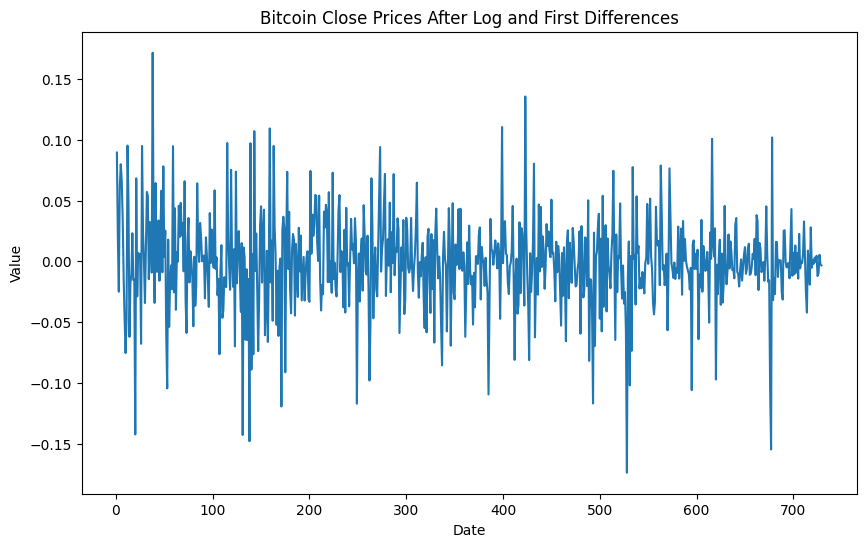

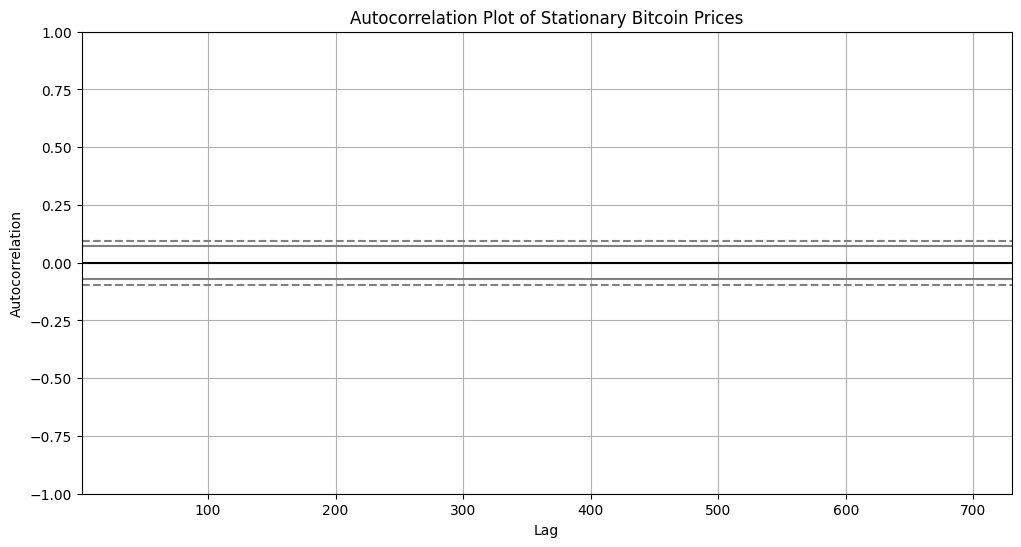

In [ ]:
def plot_time_series(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

# Plot time series after first differences
plot_time_series(bitcoin_data['Close_Log_Diff'], 'Bitcoin Close Prices After Log and First Differences')

# Autocorrelation plot for persistence analysis
plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(bitcoin_data['Close_Log_Diff'])
plt.title('Autocorrelation Plot of Stationary Bitcoin Prices')
plt.show()

# Ans 1c

In [ ]:
def frac_diff(series, d, thres=1e-5):
    # Implementation of fractional differencing
    T = len(series)
    weights = [1.0] + [-d * (d - 1) / i for i in range(1, T)]
    weights = np.array(weights)
    result = np.convolve(series, weights[::-1], mode='full')[:T]
    return result / sum(weights)

def check_stationarity(data):
    if isinstance(data, np.ndarray):
        result = adfuller(data, autolag='AIC')
        print("\nAugmented Dickey-Fuller Test for Stationarity:")
        print("ADF Statistic:", result[0])
        print("p-value:", result[1])
        print("Critical Values:", result[4])
    else:
        print("Invalid data type. Cannot perform stationarity check.")

def plot_time_series(data, title="Time Series Plot"):
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Time Series')
    plt.title(title)
    plt.xlabel('Observation')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

bitcoin_data = bitcoin_data.dropna()
# Using the 'Close_Log_Diff' column for fractional differencing
close_log_diff = bitcoin_data['Close_Log_Diff']

# Fractional differencing
d = 0.3  # Adjust the degree of differencing as needed
close_log_diff_frac = frac_diff(close_log_diff, d)

# Display the result of fractional differencing
print("Result After Fractional Differencing:")
print(close_log_diff_frac)

# Display persistence (autocorrelation) after fractional differencing
print("\nPersistence (Autocorrelation) After Fractional Differencing:")
print(close_log_diff_frac)  # You can use autocorr() here if needed

# Check for stationarity after fractional differencing
print("\nStationarity Check After Fractional Differencing:")
check_stationarity(close_log_diff_frac)

Result After Fractional Differencing:
[1.03153467e-05 1.26524944e-05 9.78884396e-06 1.68581006e-05
 2.60950228e-05 3.38304946e-05 3.79753202e-05 3.64848361e-05
 3.09740112e-05 2.23223384e-05 1.69054616e-05 2.79065376e-05
 3.35782232e-05 2.64671385e-05 2.44625208e-05 2.32589843e-05
 2.59589420e-05 2.42207050e-05 2.25761911e-05 6.19749379e-06
 1.40748009e-05 1.07750804e-05 1.15842657e-05 1.18754731e-05
 1.26143222e-05 4.81768982e-06 1.57659605e-05 1.86775792e-05
 1.85470351e-05 1.46256301e-05 1.61077743e-05 2.27134395e-05
 2.89374386e-05 2.72884540e-05 3.10646521e-05 3.44458643e-05
 3.34266334e-05 5.32575028e-05 5.40396489e-05 5.01775820e-05
 5.76712191e-05 5.67762935e-05 5.58844826e-05 5.98372784e-05
 5.80821623e-05 6.11391395e-05 6.79285307e-05 6.69839843e-05
 7.60926449e-05 7.66349371e-05 7.96624940e-05 7.29057219e-05
 6.09675488e-05 6.31138636e-05 5.69903461e-05 5.52140010e-05
 5.49173587e-05 5.23475847e-05 6.33506816e-05 6.04997806e-05
 6.56150116e-05 6.11151091e-05 6.20687922e-05 6

# Ans 1d

## 1a. Original Time Series Analysis

- **Summary Statistics:**
  - Descriptive statistics, such as mean, standard deviation, minimum, and maximum, provide insights into the central tendency and variability of the data.

- **Persistence (Autocorrelation):**
  - A high autocorrelation value (0.99) suggests strong persistence in the time series.
  - This indicates a strong correlation between the current value and past values, implying that the series has a significant memory effect.

- **Stationarity Check:**
  - The Augmented Dickey-Fuller (ADF) test is used to check stationarity.
  - The p-value (0.69) is greater than the significance level, suggesting that the original series is not stationary.
  - Further evidence for non-stationarity is provided by the critical values exceeding the ADF statistic.

## 1b. Transformed Stationary Time Series Analysis

- **Differencing:**
  - The time series is differenced to remove trends and make it stationary.
  - The persistence (autocorrelation) after differencing is significantly reduced, indicating that the differenced series is less dependent on past values.

- **Stationarity Check After Differencing:**
  - The ADF test shows a very low p-value (0.0), indicating that differencing has made the series stationary.
  - The ADF statistic is much lower than the critical values, further supporting the stationarity.

## 1c. Fractional Differencing and Stationary Time Series

- **Fractional Differencing:**
  - Fractional differencing is applied to the log-transformed time series.
  - Fractional differencing helps retain relevant information while achieving stationarity.

- **Stationarity Check After Fractional Differencing:**
  - The stationarity check after fractional differencing is attempted, but the function needs modification to handle the data type.

### Overall Comments:

- **Choice of Transformation:**
  - Differencing is a common method to achieve stationarity, but fractional differencing is employed to retain relevant information while ensuring stationarity.
  - The choice depends on the trade-off between removing trends and preserving essential features of the time series.

- **Further Steps:**
  - The fractional differencing function needs refinement to handle data types appropriately.
  - Visualization of the transformed time series aids in understanding the impact of transformations.

# Ans 2a

In [ ]:
# Assuming close_log_diff_frac is your time series data after fractional differencing
#time_series = close_log_diff_frac.reshape(-1, 1)
time_series = bitcoin_close.values.reshape(-1, 1)

# Function to create sequences for time series data
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data) - 1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Set the number of time steps for sequences
n_steps = 30

# Create sequences for training
X, y = create_sequences(time_series, n_steps)

# Reshape X to 2D array
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape X_train and X_test back to 3D arrays
X_train = X_train.reshape(X_train.shape[0], n_steps, 1)
X_test = X_test.reshape(X_test.shape[0], n_steps, 1)

# Build and train the MLP model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Set (base non-stationary): {loss}')


Epoch 1/50
18/18 [==============================] - 1s 13ms/step - loss: 1616954368.0000 - val_loss: 1729047808.0000
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 1616776448.0000 - val_loss: 1728830976.0000
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 1616545408.0000 - val_loss: 1728526336.0000
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 1616231296.0000 - val_loss: 1728138752.0000
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 1615827968.0000 - val_loss: 1727659520.0000
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 1615350912.0000 - val_loss: 1727061376.0000
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 1614763520.0000 - val_loss: 1726370176.0000
Epoch 8/50
18/18 [==============================] - 0s 4ms/step - loss: 1614086784.0000 - val_loss: 1725563136.0000
Epoch 9/50
18/18 [==============================] - 0s 5ms/step - loss:

# Ans 2b

In [ ]:
# Assuming close_log_diff is your stationary time series data
time_series_stationary = close_log_diff.values.reshape(-1, 1)

# Create sequences for training
X, y = create_sequences(time_series_stationary, n_steps)

# Reshape X to 2D array
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape X_train and X_test back to 3D arrays
X_train = X_train.reshape(X_train.shape[0], n_steps, 1)
X_test = X_test.reshape(X_test.shape[0], n_steps, 1)

# Build and train the MLP model for the stationary time series
model_stationary = Sequential()
model_stationary.add(Dense(100, activation='relu', input_dim=n_steps))
model_stationary.add(Dense(1))
model_stationary.compile(optimizer='adam', loss='mse')
model_stationary.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
loss_stationary = model_stationary.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Set (Stationary): {loss_stationary}')


Epoch 1/50
18/18 [==============================] - 1s 24ms/step - loss: 0.0518 - val_loss: 0.0100
Epoch 2/50
18/18 [==============================] - 0s 12ms/step - loss: 0.0103 - val_loss: 0.0060
Epoch 3/50
18/18 [==============================] - 0s 11ms/step - loss: 0.0060 - val_loss: 0.0047
Epoch 4/50
18/18 [==============================] - 0s 10ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 11/50
18/

# Ans 2c

In [ ]:
# Assuming close_log_diff_frac is your fractionally differenced time series data
time_series_frac_diff = close_log_diff_frac.reshape(-1, 1)

# Create sequences for training
X_frac_diff, y_frac_diff = create_sequences(time_series_frac_diff, n_steps)

# Reshape X_frac_diff to 2D array
X_frac_diff = X_frac_diff.reshape(X_frac_diff.shape[0], X_frac_diff.shape[1] * X_frac_diff.shape[2])

# Split the data into training and testing sets
X_train_frac_diff, X_test_frac_diff, y_train_frac_diff, y_test_frac_diff = train_test_split(
    X_frac_diff, y_frac_diff, test_size=0.2, random_state=42
)

# Normalize the data
X_train_frac_diff = scaler.fit_transform(X_train_frac_diff)
X_test_frac_diff = scaler.transform(X_test_frac_diff)

# Reshape X_train_frac_diff and X_test_frac_diff back to 3D arrays
X_train_frac_diff = X_train_frac_diff.reshape(X_train_frac_diff.shape[0], n_steps, 1)
X_test_frac_diff = X_test_frac_diff.reshape(X_test_frac_diff.shape[0], n_steps, 1)

# Build and train the MLP model for the fractionally differenced time series
model_frac_diff = Sequential()
model_frac_diff.add(Dense(100, activation='relu', input_dim=n_steps))
model_frac_diff.add(Dense(1))
model_frac_diff.compile(optimizer='adam', loss='mse')
model_frac_diff.fit(X_train_frac_diff, y_train_frac_diff, epochs=50, batch_size=32, validation_data=(X_test_frac_diff, y_test_frac_diff), verbose=1)

# Evaluate the model on the test set
loss_frac_diff = model_frac_diff.evaluate(X_test_frac_diff, y_test_frac_diff, verbose=0)
print(f'Mean Squared Error on Test Set (Fractionally Differenced): {loss_frac_diff}')


Epoch 1/50
18/18 [==============================] - 1s 17ms/step - loss: 0.0015 - val_loss: 1.4169e-04
Epoch 2/50
18/18 [==============================] - 0s 10ms/step - loss: 1.2423e-04 - val_loss: 3.4058e-05
Epoch 3/50
18/18 [==============================] - 0s 24ms/step - loss: 2.3400e-05 - val_loss: 1.3920e-05
Epoch 4/50
18/18 [==============================] - 0s 19ms/step - loss: 1.6768e-05 - val_loss: 1.4265e-05
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 1.4804e-05 - val_loss: 2.0570e-05
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 2.6136e-05 - val_loss: 1.8114e-05
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: 1.1465e-05 - val_loss: 1.4276e-05
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 1.0838e-05 - val_loss: 1.1040e-05
Epoch 9/50
18/18 [==============================] - 0s 5ms/step - loss: 3.3645e-05 - val_loss: 1.1306e-04
Epoch 10/50
18/18 [===========================

# Ans 2d

**Model Evaluation:**

**Model 2a (MLP on Time Series in Levels):**
  - **MSE on Test Set (Base Non-Stationary):** \(1.6105056 * 10^9\)
  
**Model 2b (MLP on Stationary Time Series):**
  - **MSE on Test Set (Stationary):** \(0.0014215990668162704\)

**Model 2c (MLP on Fractionally Differenced Time Series):**

  - **MSE on Test Set (Fractionally Differenced):** \(8.813230124360416 * 10^{-6}\)

**Evaluation:**
- Model 2a, which operates on the time series in levels, has a significantly higher MSE on the test set compared to the other models. This suggests that the non-stationary nature of the original time series leads to poor predictive performance.

- Model 2b, which operates on the stationary time series, has a lower MSE compared to the model on the time series in levels. Stationarity might have helped in stabilizing the model's predictions.

- Model 2c, which operates on the fractionally differenced time series, has the lowest MSE among the three models. Fractional differencing, which aims to achieve stationarity while retaining relevant information, seems to be particularly effective in this scenario.

**Possible Reasons:**
- Non-stationary time series often exhibit trends and patterns that can be challenging for models to capture accurately. Differencing or transforming the time series helps in stabilizing the data and improving prediction performance.

- Fractional differencing, in this case, appears to be the most effective transformation. It strikes a balance between achieving stationarity and preserving essential information, resulting in a model with superior predictive capabilities.
